In [1]:
import pandas as pd

df = pd.read_pickle('df.pickle')
df.sort_values('Date', inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-23,204.429993,207.750000,203.899994,207.479996,204.799362,23323000
1,2019-04-24,207.360001,208.479996,207.050003,207.160004,204.483505,17540600
2,2019-04-25,206.830002,207.759995,205.119995,205.279999,202.627808,18543200
3,2019-04-26,204.899994,205.000000,202.119995,204.300003,201.660461,18649100
4,2019-04-29,204.399994,205.970001,203.860001,204.610001,201.966461,22204700


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-23,204.429993,207.750000,203.899994,207.479996,204.799362,23323000
2019-04-24,207.360001,208.479996,207.050003,207.160004,204.483505,17540600
2019-04-25,206.830002,207.759995,205.119995,205.279999,202.627808,18543200
2019-04-26,204.899994,205.000000,202.119995,204.300003,201.660461,18649100
2019-04-29,204.399994,205.970001,203.860001,204.610001,201.966461,22204700


In [3]:
df2 = df.resample('3D').mean()
df2.head()
# 3D is alias for stock values to use 3 days of data for any valuation like mean etc.
# please notice the dates. every 3rd day is being shown.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-23,206.206665,207.996664,205.356664,206.640000,203.970225,1.980227e+07
2019-04-26,204.899994,205.000000,202.119995,204.300003,201.660461,1.864910e+07
2019-04-29,205.779999,208.226664,204.066666,205.266668,202.614644,4.452230e+07
2019-05-02,210.364998,212.244995,209.180001,210.449997,207.731010,2.644435e+07
2019-05-05,205.084999,208.129997,202.165001,205.669999,203.012772,3.560340e+07


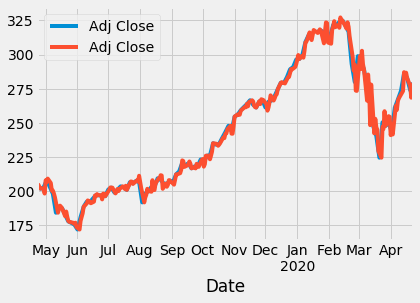

In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
df2['Adj Close'].plot()
df['Adj Close'].plot()
plt.legend()
plt.show()

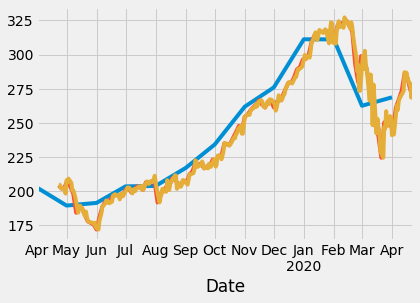

In [8]:
# let us try for a month
df3 = df.resample('1M').mean()
df3.head()
df3['Adj Close'].plot()
df2['Adj Close'].plot()
df['Adj Close'].plot()
plt.show()

In [9]:
# resampling using ohlc (Open High Low Close)
df2 = df['Adj Close'].resample('10D').ohlc()
df2.head()

,open,high,low,close
Date,,,,
2019-04-23,204.799362,207.800110,198.077362,206.447800
2019-05-03,209.014221,209.014221,195.381973,195.381973
2019-05-13,184.026489,189.179062,181.113281,181.113281
2019-05-23,178.021744,178.021744,173.473602,173.473602
2019-06-02,171.719727,193.033585,171.719727,193.033585


In [11]:
# resampling using ohlc (Open High Low Close)
df3 = df['Adj Close'].resample('2D').ohlc()
df3.head()

,open,high,low,close
Date,,,,
2019-04-23,204.799362,204.799362,204.483505,204.483505
2019-04-25,202.627808,202.627808,201.660461,201.660461
2019-04-27,NaN,NaN,NaN,NaN
2019-04-29,201.966461,201.966461,198.077362,198.077362
2019-05-01,207.800110,207.800110,206.447800,206.447800


In [12]:
# we have NAN data .. this might me due to weekend.... 
df3.dropna(inplace=True)
df3.head()

,open,high,low,close
Date,,,,
2019-04-23,204.799362,204.799362,204.483505,204.483505
2019-04-25,202.627808,202.627808,201.660461,201.660461
2019-04-29,201.966461,201.966461,198.077362,198.077362
2019-05-01,207.800110,207.800110,206.447800,206.447800
2019-05-03,209.014221,209.014221,209.014221,209.014221


In [19]:
# another wat to ignore NaN value is .. using the fill() method..
df4 = df['Adj Close'].resample('2D').ohlc().fillna(method='ffill')
df4.head()  #check 3rd row

,open,high,low,close
Date,,,,
2019-04-23,204.799362,204.799362,204.483505,204.483505
2019-04-25,202.627808,202.627808,201.660461,201.660461
2019-04-27,202.627808,202.627808,201.660461,201.660461
2019-04-29,201.966461,201.966461,198.077362,198.077362
2019-05-01,207.800110,207.800110,206.447800,206.447800
